In [9]:
import pandas as pd

# Cargar los datos desde el archivo CSV con coma como delimitador
data = pd.read_csv('C:/Users/jeico/Downloads/datosmasas.csv', delimiter=',')

# Verificar las primeras filas del DataFrame para asegurarnos de que los datos se hayan cargado correctamente
print(data.head())


   particula  masas      x      y      z
0          1    2.0  -53.0   79.0  -91.0
1          2    2.0   13.0 -142.0 -177.0
2          3    2.0 -109.0 -103.0 -120.0
3          4    2.0    4.0  -96.0  110.0
4          5    4.0  222.0  -22.0 -236.0


# Análisis de las masas en 2D

In [40]:
import pandas as pd

# Cargar los datos desde el archivo CSV con coma como delimitador
data = pd.read_csv('C:/Users/jeico/Downloads/datosmasas.csv', delimiter=',')

# Calcular la masa total del sistema
masa_total = data['masas'].sum()

# Calcular el centro de masa del sistema en coordenadas x e y
centro_de_masa_x = (data['masas'] * data['x']).sum() / masa_total
centro_de_masa_y = (data['masas'] * data['y']).sum() / masa_total

print("Masa total del sistema:", masa_total)
print("Centro de masa del sistema (coordenada x):", centro_de_masa_x)
print("Centro de masa del sistema (coordenada y):", centro_de_masa_y)


Masa total del sistema: 4627.0
Centro de masa del sistema (coordenada x): 825.8152150421439
Centro de masa del sistema (coordenada y): 776.9185217203371


# Cálculo del tensor momento de inercia en 2D


In [41]:
import numpy as np

# Calcular las coordenadas relativas al centro de masa
data['x_cm'] = data['x'] - centro_de_masa_x
data['y_cm'] = data['y'] - centro_de_masa_y

# Calcular los elementos de la matriz del tensor momento de inercia en 2D
Ixx = (data['masas'] * data['y_cm']**2).sum()
Iyy = (data['masas'] * data['x_cm']**2).sum()
Ixy = -(data['masas'] * data['x_cm'] * data['y_cm']).sum()

# Construir la matriz del tensor momento de inercia
tensor_momento_inercia_2D = np.array([[Ixx, Ixy], [Ixy, Iyy]])

# Calcular los autovalores y autovectores del tensor momento de inercia
autovalores, autovectores = np.linalg.eig(tensor_momento_inercia_2D)

print("\nCálculo del tensor momento de inercia en 2D")
print("Tensor momento de inercia en 2D:")
print(tensor_momento_inercia_2D)
print("\nAutovalores:")
print(autovalores)
print("\nAutovectores:")
print(autovectores)



Cálculo del tensor momento de inercia en 2D
Tensor momento de inercia en 2D:
[[ 9.63660148e+08 -9.11747911e+08]
 [-9.11747911e+08  9.58535589e+08]]

Autovalores:
[1.87284938e+09 4.93463569e+07]

Autovectores:
[[ 0.70809967  0.7061125 ]
 [-0.7061125   0.70809967]]


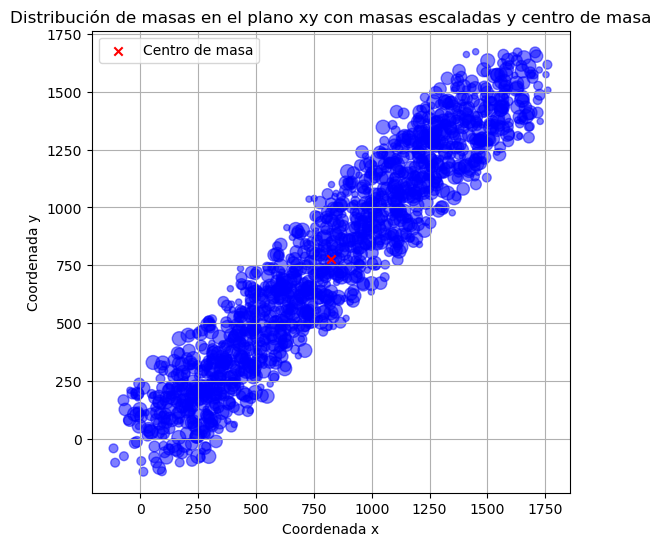

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer coordenadas x e y de las partículas y sus masas
x = data['x']
y = data['y']
masas = data['masas']

# Calcular el centro de masa
centro_x = np.sum(x * masas) / np.sum(masas)
centro_y = np.sum(y * masas) / np.sum(masas)

# Escalar las masas para que sean visibles en la gráfica
tamaño_puntos = 100 * masas / np.max(masas)  # Escalar el tamaño de los puntos según las masas

# Graficar distribución de masas en el plano xy con puntos escalados y centro de masa
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=tamaño_puntos, color='blue', alpha=0.5)  # Puntos azules escalados por masa
plt.scatter(centro_x, centro_y, marker='x', color='red', label='Centro de masa')  # Centro de masa
plt.title('Distribución de masas en el plano xy con masas escaladas y centro de masa')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Aspecto igual para ejes x y y
plt.legend()
plt.show()


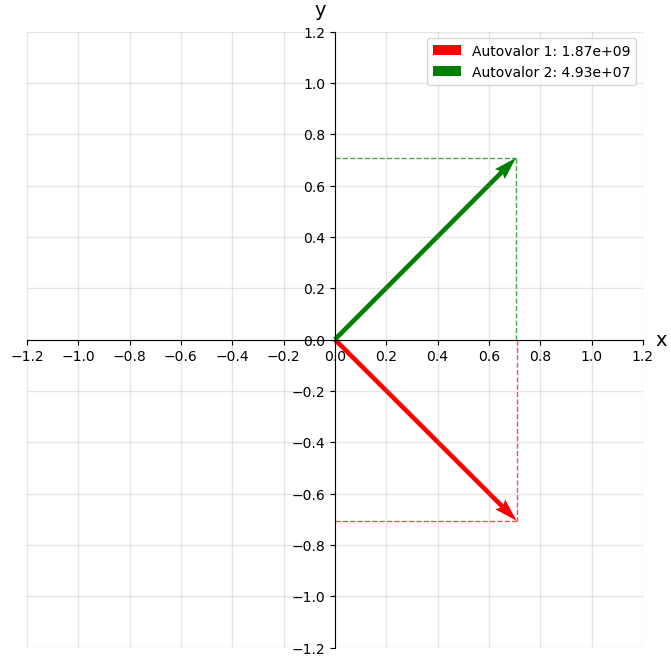

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los autovectores y autovalores
autovectores = np.array([[0.70809967, 0.7061125], [-0.7061125, 0.70809967]])
autovalores = np.array([1.87284938e9, 4.93463569e7])

# Datos de los autovectores (puntos de inicio)
x0 = 0
y0 = 0

# Colores para cada autovector
colores = ['red', 'green']

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 8))

# Graficar los autovectores como flechas
for i in range(len(autovalores)):
    ax.quiver(x0, y0, autovectores[0, i], autovectores[1, i], angles='xy', scale_units='xy', scale=1, color=colores[i], label=f'Autovalor {i+1}: {autovalores[i]:.2e}')

# Configuración de los ejes
ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Marcar los puntos de intersección de los autovectores con los ejes
for i in range(len(autovalores)):
    ax.plot([0, autovectores[0, i]], [autovectores[1, i], autovectores[1, i]], color=colores[i], linestyle='--', linewidth=1, alpha=0.7)
    ax.plot([autovectores[0, i], autovectores[0, i]], [0, autovectores[1, i]], color=colores[i], linestyle='--', linewidth=1, alpha=0.7)

# Etiquetas de los ejes
ticks_frequency = 0.2
x_ticks = np.arange(-1.2, 1.3, ticks_frequency)
y_ticks = np.arange(-1.2, 1.3, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Rejilla
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Leyenda
ax.legend()

plt.show()


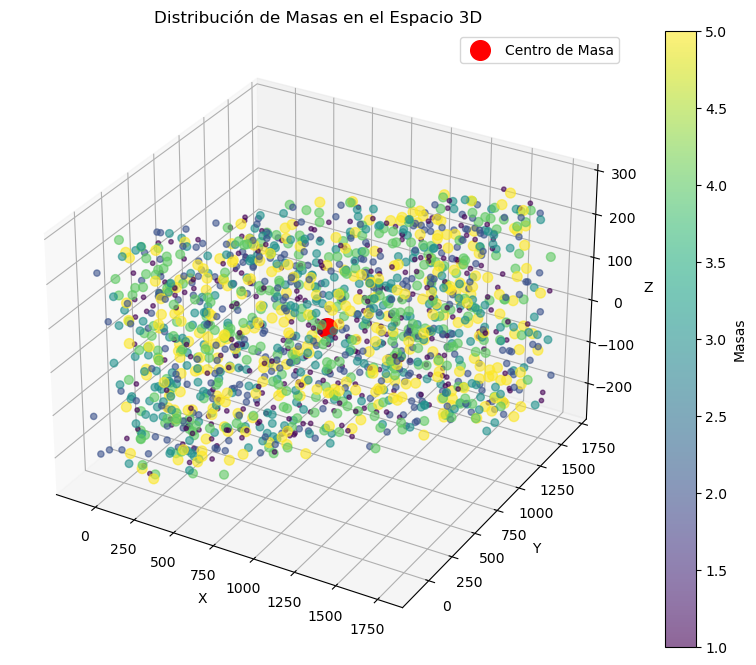

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos desde el archivo CSV con coma como delimitador
data = pd.read_csv('C:/Users/jeico/Downloads/datosmasas.csv', delimiter=',')
# Calcular el centro de masa
center_of_mass = data[['x', 'y', 'z']].mean().values

# Graficar el centro de masa
ax.scatter(center_of_mass[0], center_of_mass[1], center_of_mass[2], c='red', marker='o', s=200, label='Centro de Masa')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Escalar los puntos en función de sus masas
scaled_masses = data['masas'] * 10

# Graficar los puntos escalados con colores según sus masas
sc = ax.scatter(data['x'], data['y'], data['z'], c=data['masas'], s=scaled_masses, cmap='viridis', alpha=0.6)

# Graficar el centro de masa
ax.scatter(center_of_mass[0], center_of_mass[1], center_of_mass[2], c='red', marker='o', s=200, label='Centro de Masa')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título y leyenda
ax.set_title('Distribución de Masas en el Espacio 3D')
ax.legend()

# Mostrar la gráfica
plt.colorbar(sc, label='Masas')
plt.show()


In [86]:
# Calcular la masa total del sistema
masa_total = data['masas'].sum()

# Calcular el centro de masa en 3D
centro_de_masa_3d = (data[['x', 'y', 'z']] * data['masas'].values[:, np.newaxis]).sum() / masa_total

print("Centro de Masa del sistema (coordenada x):", centro_de_masa_3d.iloc[0])
print("Centro de Masa del sistema (coordenada y):", centro_de_masa_3d.iloc[1])
print("Centro de Masa del sistema (coordenada z):", centro_de_masa_3d.iloc[2])



Centro de Masa del sistema (coordenada x): 825.8152150421439
Centro de Masa del sistema (coordenada y): 776.9185217203371
Centro de Masa del sistema (coordenada z): 15.503349902744759


In [87]:
import numpy as np

# Calcular el tensor de inercia en 3D
def calcular_tensor_inercia_3d(data):
    # Obtener las masas y las coordenadas
    masas = data['masas']
    coordenadas = data[['x', 'y', 'z']]
    
    # Calcular el centro de masa
    centro_de_masa = np.average(coordenadas, axis=0, weights=masas)
    
    # Centrar las coordenadas en el centro de masa
    coordenadas_centrales = coordenadas - centro_de_masa
    
    # Calcular el tensor de inercia
    tensor_inercia = np.zeros((3, 3))
    for i in range(len(masas)):
        tensor_inercia += masas[i] * np.outer(coordenadas_centrales.iloc[i], coordenadas_centrales.iloc[i])
    
    return tensor_inercia

# Calcular el tensor de inercia en 3D
tensor_inercia_3d = calcular_tensor_inercia_3d(data)
print("Tensor de inercia en 3D:")
print(tensor_inercia_3d)


Tensor de inercia en 3D:
[[ 9.58535589e+08  9.11747911e+08 -7.14204864e+06]
 [ 9.11747911e+08  9.63660148e+08 -1.92959724e+06]
 [-7.14204864e+06 -1.92959724e+06  1.01843321e+08]]


In [88]:
# Calcular los autovectores y autovalores del tensor de inercia en 3D
autovalores, autovectores = np.linalg.eig(tensor_inercia_3d)

# Imprimir los autovalores y autovectores
print("Autovalores:")
print(autovalores)
print("\nAutovectores:")
print(autovectores)


Autovalores:
[1.87287258e+09 4.90874822e+07 1.02078999e+08]

Autovectores:
[[ 0.70611307  0.70654139 -0.04694255]
 [ 0.70808985 -0.7042117   0.05190995]
 [-0.00361904  0.06989384  0.99754787]]


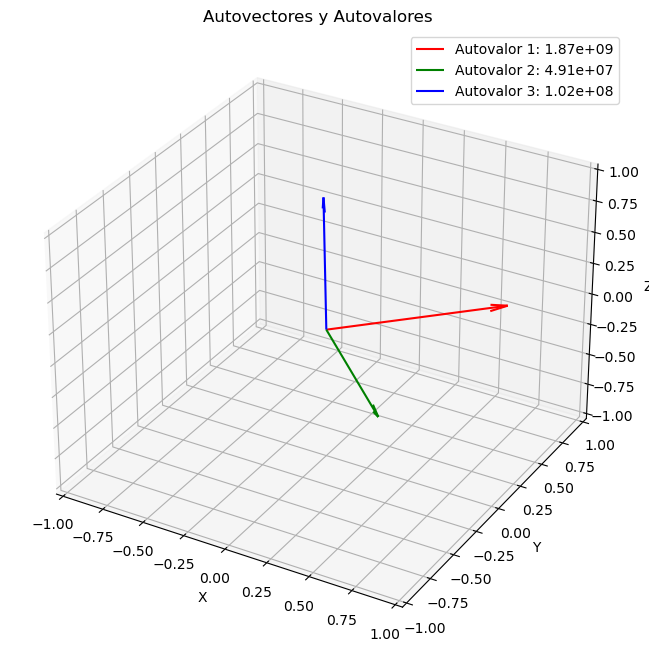

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los autovalores y autovectores proporcionados
autovalores = np.array([1.87287258e+09, 4.90874822e+07, 1.02078999e+08])
autovectores = np.array([[ 0.70611307,  0.70654139, -0.04694255],
                         [ 0.70808985, -0.7042117 ,  0.05190995],
                         [-0.00361904,  0.06989384,  0.99754787]])

# Puntos de inicio de los autovectores
x0, y0, z0 = 0, 0, 0

# Colores para cada autovector
colores = ['red', 'green', 'blue']

# Configuración de la figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los autovectores como flechas
for i in range(len(autovalores)):
    ax.quiver(x0, y0, z0, autovectores[0, i], autovectores[1, i], autovectores[2, i],
              arrow_length_ratio=0.1, color=colores[i], label=f'Autovalor {i+1}: {autovalores[i]:.2e}')

# Configurar los límites de los ejes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Ajustar las etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título y leyenda
ax.set_title('Autovectores y Autovalores')
ax.legend()

# Mostrar la gráfica
plt.show()
